In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as datetime

In [3]:
df = pd.read_csv('/Users/kxng/Downloads/archive/index_1.csv')

df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.info()

print('Shape :\t{}'.format(df.shape))
print('Duplicated : {}'.format(df.duplicated().sum()))
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB
Shape :	(3636, 6)
Duplicated : 0


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
df['date']=pd.to_datetime(df['date'])
df['datetime']=pd.to_datetime(df['datetime'])
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [6]:
df['Year']=df['datetime'].dt.year
df['Month']=df['datetime'].dt.month_name()
df['Day']=df['datetime'].dt.day
df['Day_Name']=df['datetime'].dt.day_name()
df['hour']=pd.to_datetime(df['datetime']).dt.hour
df['Time']=df['datetime'].dt.time
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
Year                    int32
Month                  object
Day                     int32
Day_Name               object
hour                    int32
Time                   object
dtype: object

In [7]:
df.sample(5)

,date,datetime,cash_type,card,money,coffee_name,Year,Month,Day,Day_Name,hour,Time
1681,2024-09-25,2024-09-25 11:52:53.371,card,ANON-0000-0000-0665,32.82,Latte,2024,September,25,Wednesday,11,11:52:53.371000
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa,2025,March,23,Sunday,14,14:44:16.864000
204,2024-03-31,2024-03-31 10:40:04.523,card,ANON-0000-0000-0089,38.70,Cappuccino,2024,March,31,Sunday,10,10:40:04.523000
3413,2025-03-07,2025-03-07 15:09:04.325,card,ANON-0000-0000-1191,35.76,Latte,2025,March,7,Friday,15,15:09:04.325000
2073,2024-10-24,2024-10-24 15:48:29.937,card,ANON-0000-0000-0788,35.76,Latte,2024,October,24,Thursday,15,15:48:29.937000


In [8]:
from datetime import time
def classify_time_of_day(t):
    if time(5,0)<= t < time(12,0):
        return 'Morning'
    elif time(12,0) <= t < time(17,0):
        return 'Afternoon'
    elif time(17,0) <= t < time(21,0):
        return 'Evening'
    else:
        return 'Night'
    
df['Time_period']=df['Time'].apply(classify_time_of_day)
df.sample()

,date,datetime,cash_type,card,money,coffee_name,Year,Month,Day,Day_Name,hour,Time,Time_period
25,2024-03-03,2024-03-03 18:03:23.369,card,ANON-0000-0000-0020,33.8,Americano with Milk,2024,March,3,Sunday,18,18:03:23.369000,Evening


In [9]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'Year',
       'Month', 'Day', 'Day_Name', 'hour', 'Time', 'Time_period'],
      dtype='object')

In [10]:
cash_counts = df.cash_type.value_counts()
print(cash_counts)

cash_type
card    3547
cash      89
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Payments by Cash Type')

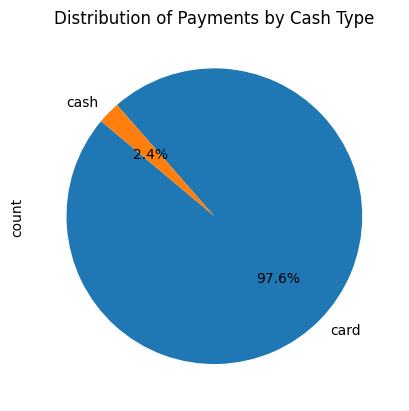

In [11]:
plt.Figure(figsize=(8,6))
cash_counts.plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Payments by Cash Type')

In [12]:
coffee_count=df.coffee_name.value_counts()
coffee_count

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution Coffee Sales')

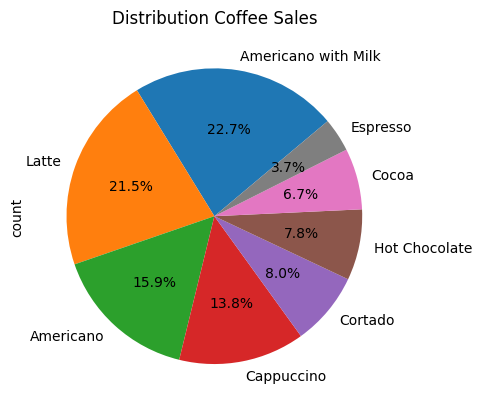

In [13]:
plt.Figure(figsize=(12,6))
coffee_count.plot.pie(autopct='%1.1f%%',startangle=400)
plt.title('Distribution Coffee Sales')

In [14]:
df.coffee_name.value_counts()

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

/var/folders/1m/4p7yv_4d2xxc9_rp8gxw39mw0000gn/T/ipykernel_55024/3200769286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='coffee_name',order=df.coffee_name.value_counts().index,palette='viridis')


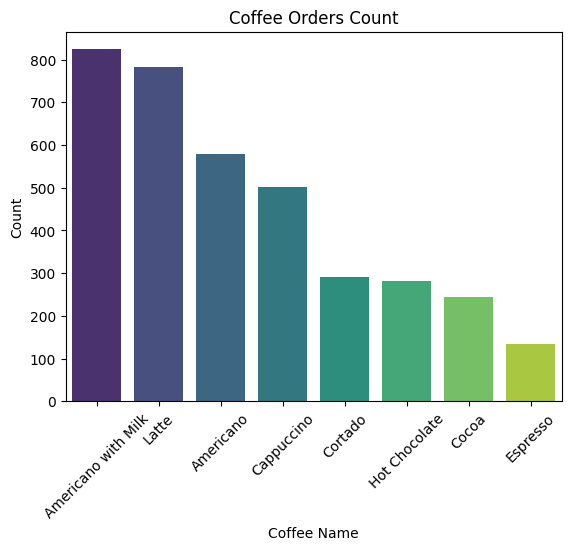

In [15]:
plt.Figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='coffee_name',order=df.coffee_name.value_counts().index,palette='viridis')

plt.title('Coffee Orders Count')
plt.xlabel('Coffee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
print(df.loc[df['money'].idxmin(),['coffee_name','money']],'\n')
print(df.loc[df['money'].idxmax(),['coffee_name','money']])

coffee_name    Espresso
money             18.12
Name: 977, dtype: object 

coffee_name    Latte
money           40.0
Name: 12, dtype: object


<Axes: xlabel='money'>

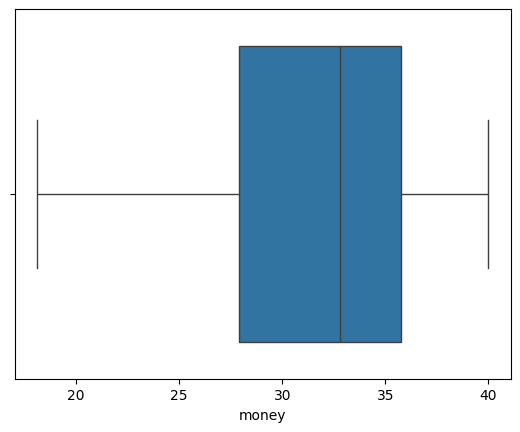

In [17]:
sns.boxplot(x=df['money'])

In [18]:
coffee_sales = df.groupby('coffee_name')['money'].sum().reset_index()
print(coffee_sales.sort_values(by='money',ascending=False))

           coffee_name     money
7                Latte  27866.30
1  Americano with Milk  25269.12
2           Cappuccino  18034.14
0            Americano  15062.26
6        Hot Chocolate  10172.46
3                Cocoa   8678.16
4              Cortado   7534.86
5             Espresso   2814.28


/var/folders/1m/4p7yv_4d2xxc9_rp8gxw39mw0000gn/T/ipykernel_55024/2678040995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_sales,x='coffee_name',y='money',palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Americano'),
  Text(1, 0, 'Americano with Milk'),
  Text(2, 0, 'Cappuccino'),
  Text(3, 0, 'Cocoa'),
  Text(4, 0, 'Cortado'),
  Text(5, 0, 'Espresso'),
  Text(6, 0, 'Hot Chocolate'),
  Text(7, 0, 'Latte')])

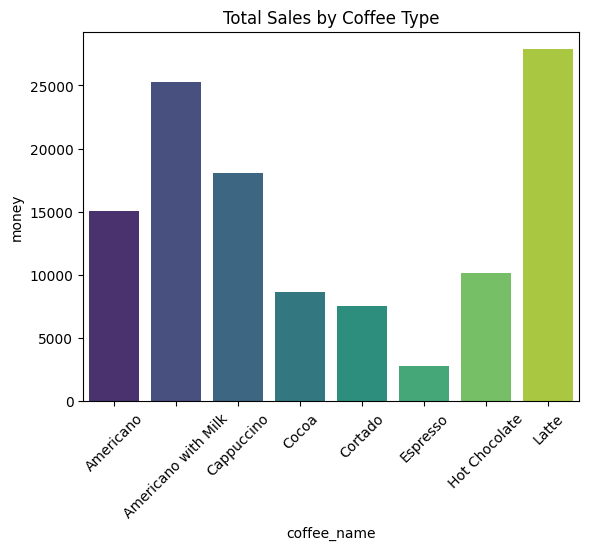

In [19]:
plt.Figure(figsize=(12,6))
sns.barplot(data=coffee_sales,x='coffee_name',y='money',palette='viridis')

plt.title('Total Sales by Coffee Type')
plt.xticks(rotation=45)

In [20]:
print(df[['Year','Month']].drop_duplicates())

      Year      Month
0     2024      March
206   2024      April
402   2024        May
669   2024       June
896   2024       July
1133  2024     August
1405  2024  September
1749  2024    October
2175  2024   November
2434  2024   December
2693  2025    January
2894  2025   February
3317  2025      March


In [21]:
sales=df.groupby(['Month'])['money'].sum().sort_values(ascending=False).reset_index()

print(sales)

        Month     money
0       March  17036.64
1     October  13891.16
2    February  13215.48
3   September   9988.64
4         May   9063.42
5    November   8590.54
6    December   8237.74
7        June   7758.76
8      August   7613.84
9        July   6915.94
10      April   6720.56
11    January   6398.86


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

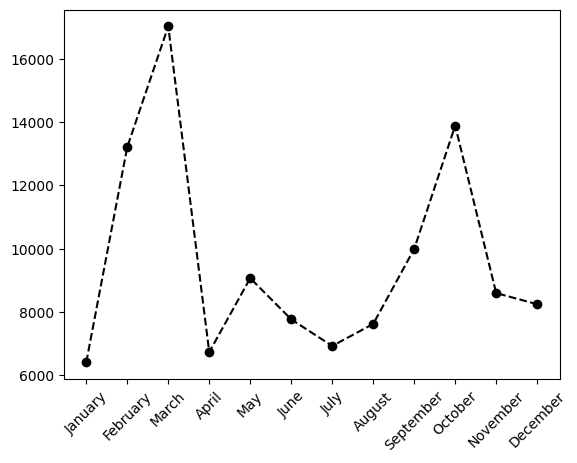

In [22]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

sales['Month']=pd.Categorical(sales['Month'],categories=month_order,ordered=True)
sales = sales.sort_values('Month')

plt.Figure(figsize=(12,6),dpi=200)
plt.plot(sales['Month'],sales['money'],c='k',ls='--',marker='o')
plt.xticks(rotation=45)

<Axes: xlabel='Month', ylabel='money'>

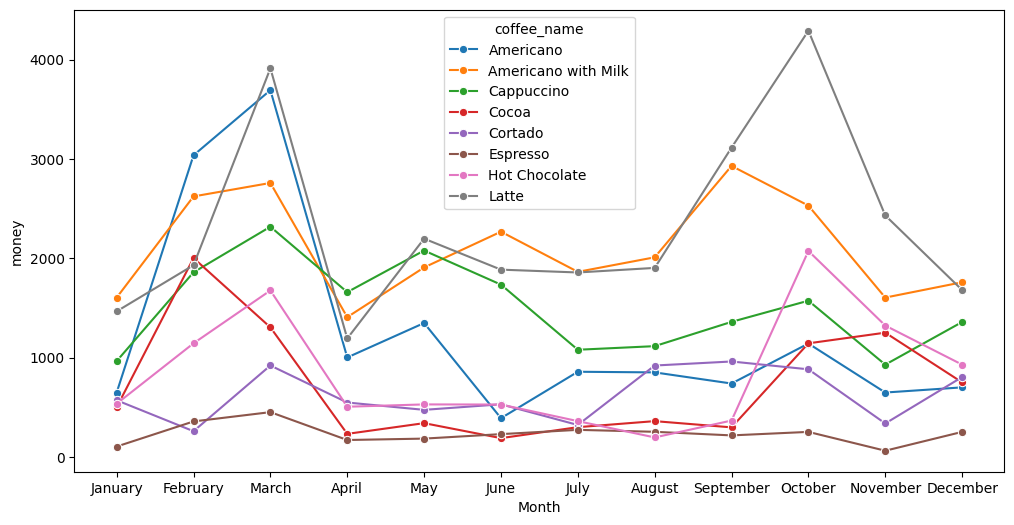

In [23]:
monthly_sales =df.groupby(['Month','coffee_name'])['money'].sum().reset_index()
plt.figure(figsize=(12,6))
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
sns.lineplot(data=monthly_sales, x='Month', y='money', hue='coffee_name', marker='o')

In [24]:
monthly_sales.sort_values(ascending=False,by='money').sample(5)

,Month,coffee_name,money
6,April,Hot Chocolate,506.02
26,February,Cappuccino,1859.52
70,May,Hot Chocolate,529.36
52,June,Cortado,530.48
37,January,Espresso,105.30


In [25]:
df[df['coffee_name']=='Americano with Milk'].groupby('Month')['money'].sum().sort_values(ascending=False).reset_index().sample(5)

,Month,money
10,November,1604.72
11,April,1407.74
5,August,2010.24
4,June,2268.12
6,May,1908.28


/var/folders/1m/4p7yv_4d2xxc9_rp8gxw39mw0000gn/T/ipykernel_55024/1392836939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Day_Name',y='money',estimator='sum',order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],palette='husl')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

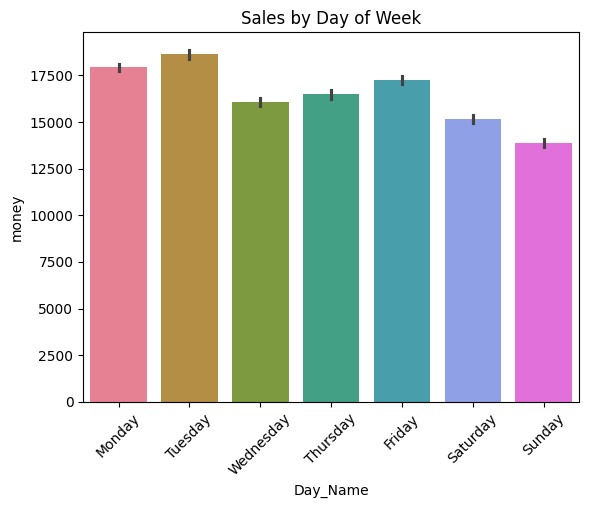

In [26]:
plt.Figure(figsize=(8,5))
sns.barplot(data=df,x='Day_Name',y='money',estimator='sum',order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],palette='husl')
plt.title('Sales by Day of Week')
plt.xticks(rotation=45)

In [27]:
df.groupby('Day_Name')['money'].sum().sort_values(ascending=False).reset_index()

,Day_Name,money
0,Tuesday,18637.38
1,Monday,17925.10
2,Friday,17257.66
3,Thursday,16477.40
4,Wednesday,16093.46
5,Saturday,15182.52
6,Sunday,13858.06


/var/folders/1m/4p7yv_4d2xxc9_rp8gxw39mw0000gn/T/ipykernel_55024/3448942135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='Time_period',palette='rocket')


Text(0.5, 1.0, 'Rush Hour by Time of Day')

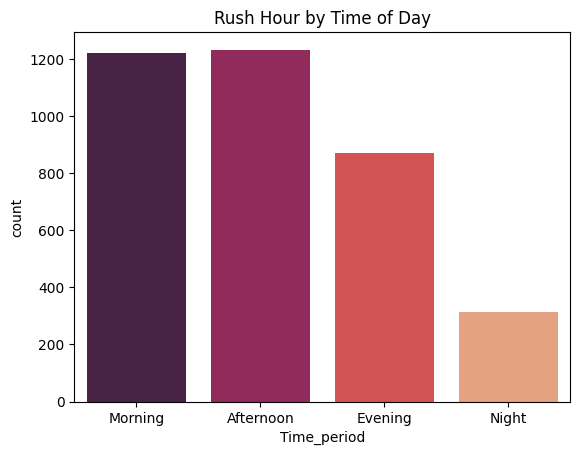

In [28]:
sns.countplot(df,x='Time_period',palette='rocket')
plt.title('Rush Hour by Time of Day')

In [29]:
df['Time_period'].value_counts()

Time_period
Afternoon    1232
Morning      1221
Evening       870
Night         313
Name: count, dtype: int64

Text(0.5, 1.0, 'Coffee_sales by Time of Day')

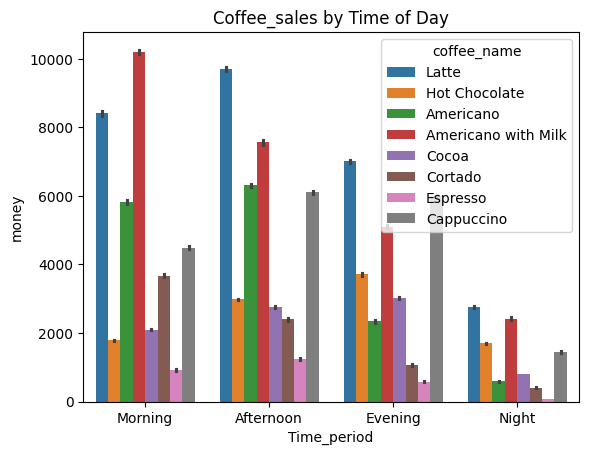

In [30]:
plt.Figure(figsize=(12,6))
sns.barplot(data=df,x='Time_period',y='money',hue='coffee_name',estimator='sum',order=['Morning','Afternoon','Evening','Night'])
plt.title('Coffee_sales by Time of Day')

In [31]:
df.groupby(['Time_period','coffee_name'])['money'].sum().sort_values(ascending=False).reset_index().sample(5)

,Time_period,coffee_name,money
29,Evening,Espresso,572.08
23,Night,Cappuccino,1446.38
5,Afternoon,Americano,6308.94
26,Morning,Espresso,922.72
30,Night,Cortado,400.66


In [32]:
summary = df.groupby(['coffee_name','Month','Time_period'],as_index=False)['money'].sum().sort_values(ascending=False,by='money')
summary.sample(5)

,coffee_name,Month,Time_period,money
299,Latte,April,Afternoon,386.34
339,Latte,October,Morning,1609.20
147,Cocoa,February,Afternoon,643.68
338,Latte,October,Evening,715.20
284,Hot Chocolate,May,Afternoon,75.44


<Axes: xlabel='Time_period', ylabel='Month'>

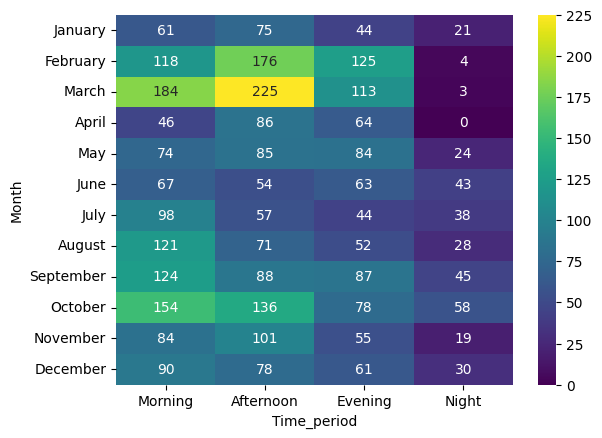

In [33]:
heatmap=df.groupby(['Month','Time_period']).size().reset_index(name='Count')
heatmap
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
time_order=['Morning','Afternoon','Evening','Night']
pv=heatmap.pivot(index='Month',columns='Time_period',values='Count').fillna(0)
pv=pv.reindex(month_order)
pv=pv[time_order]
sns.heatmap(pv,cmap='viridis',annot=True,fmt='g')

In [34]:
df[df['Month']== 'February'].groupby(['coffee_name','Time_period'])['money'].sum().sort_values(ascending=False).reset_index().head()

,coffee_name,Time_period,money
0,Americano,Afternoon,1427.80
1,Americano with Milk,Morning,1172.68
2,Cocoa,Evening,1144.32
3,Americano,Morning,1142.24
4,Latte,Afternoon,1108.56


In [35]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3547 entries, 0 to 3635
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3547 non-null   datetime64[ns]
 1   datetime     3547 non-null   datetime64[ns]
 2   cash_type    3547 non-null   object        
 3   card         3547 non-null   object        
 4   money        3547 non-null   float64       
 5   coffee_name  3547 non-null   object        
 6   Year         3547 non-null   int32         
 7   Month        3547 non-null   object        
 8   Day          3547 non-null   int32         
 9   Day_Name     3547 non-null   object        
 10  hour         3547 non-null   int32         
 11  Time         3547 non-null   object        
 12  Time_period  3547 non-null   object        
dtypes: datetime64[ns](2), float64(1), int32(3), object(7)
memory usage: 346.4+ KB


In [36]:
print('Shape : {}'.format(df1.shape))

Shape : (3547, 13)


In [37]:
repeat_customers = df1['card'].value_counts()
repeat_customers = repeat_customers[repeat_customers >1]

print('Repeat_Customers :',repeat_customers.count())

Repeat_Customers : 545


In [38]:
repeat_customers

card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
                      ... 
ANON-0000-0000-0061      2
ANON-0000-0000-0406      2
ANON-0000-0000-0058      2
ANON-0000-0000-1315      2
ANON-0000-0000-0404      2
Name: count, Length: 545, dtype: int64

In [39]:
df['Hour'] = df['datetime'].dt.hour
hourly_counts=df['Hour'].value_counts().sort_index().reset_index()
hourly_counts

,Hour,count
0,6,5
1,7,91
2,8,235
3,9,247
4,10,349
5,11,294
6,12,249
7,13,227
8,14,228
9,15,245


Text(0, 0.5, 'Number of sales')

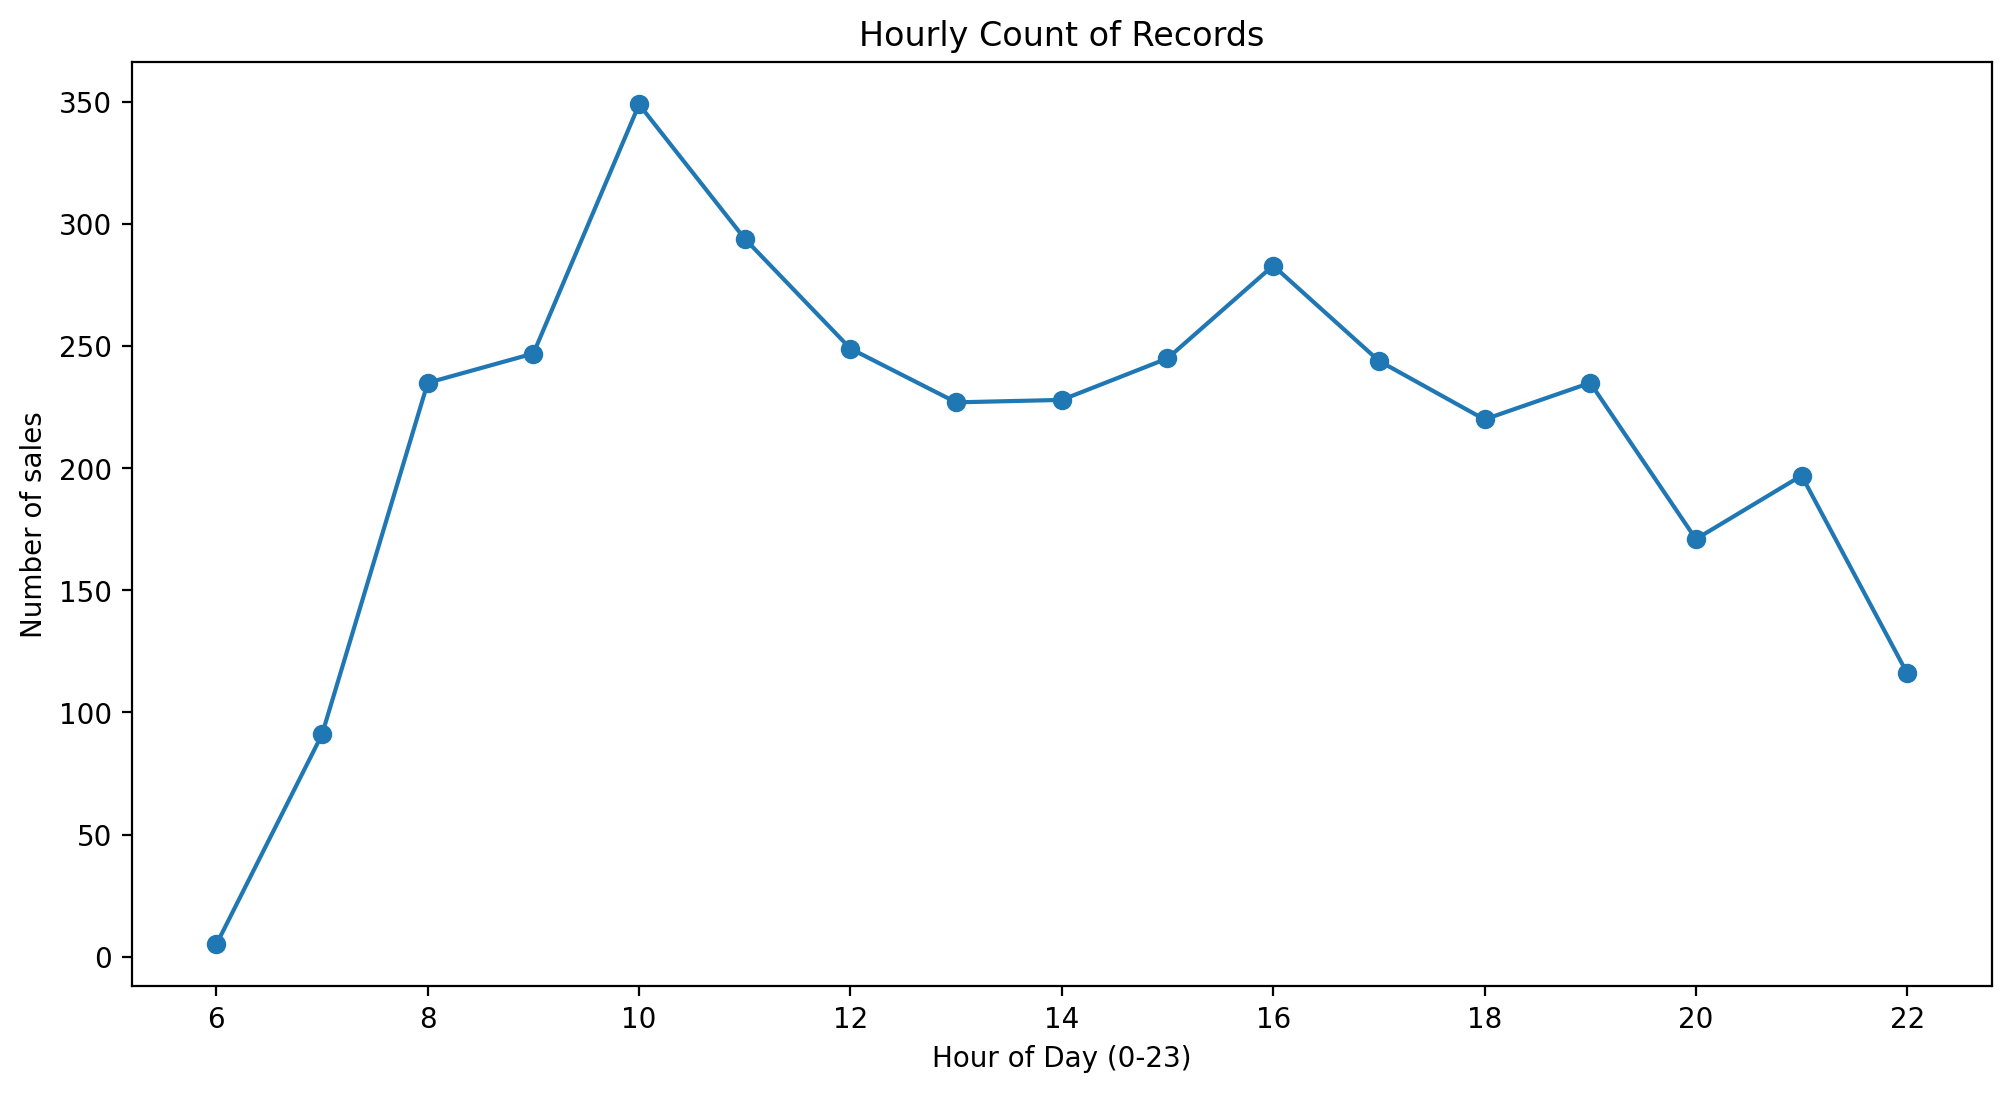

In [40]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(hourly_counts['Hour'],hourly_counts['count'], marker='o')
plt.title("Hourly Count of Records")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of sales")

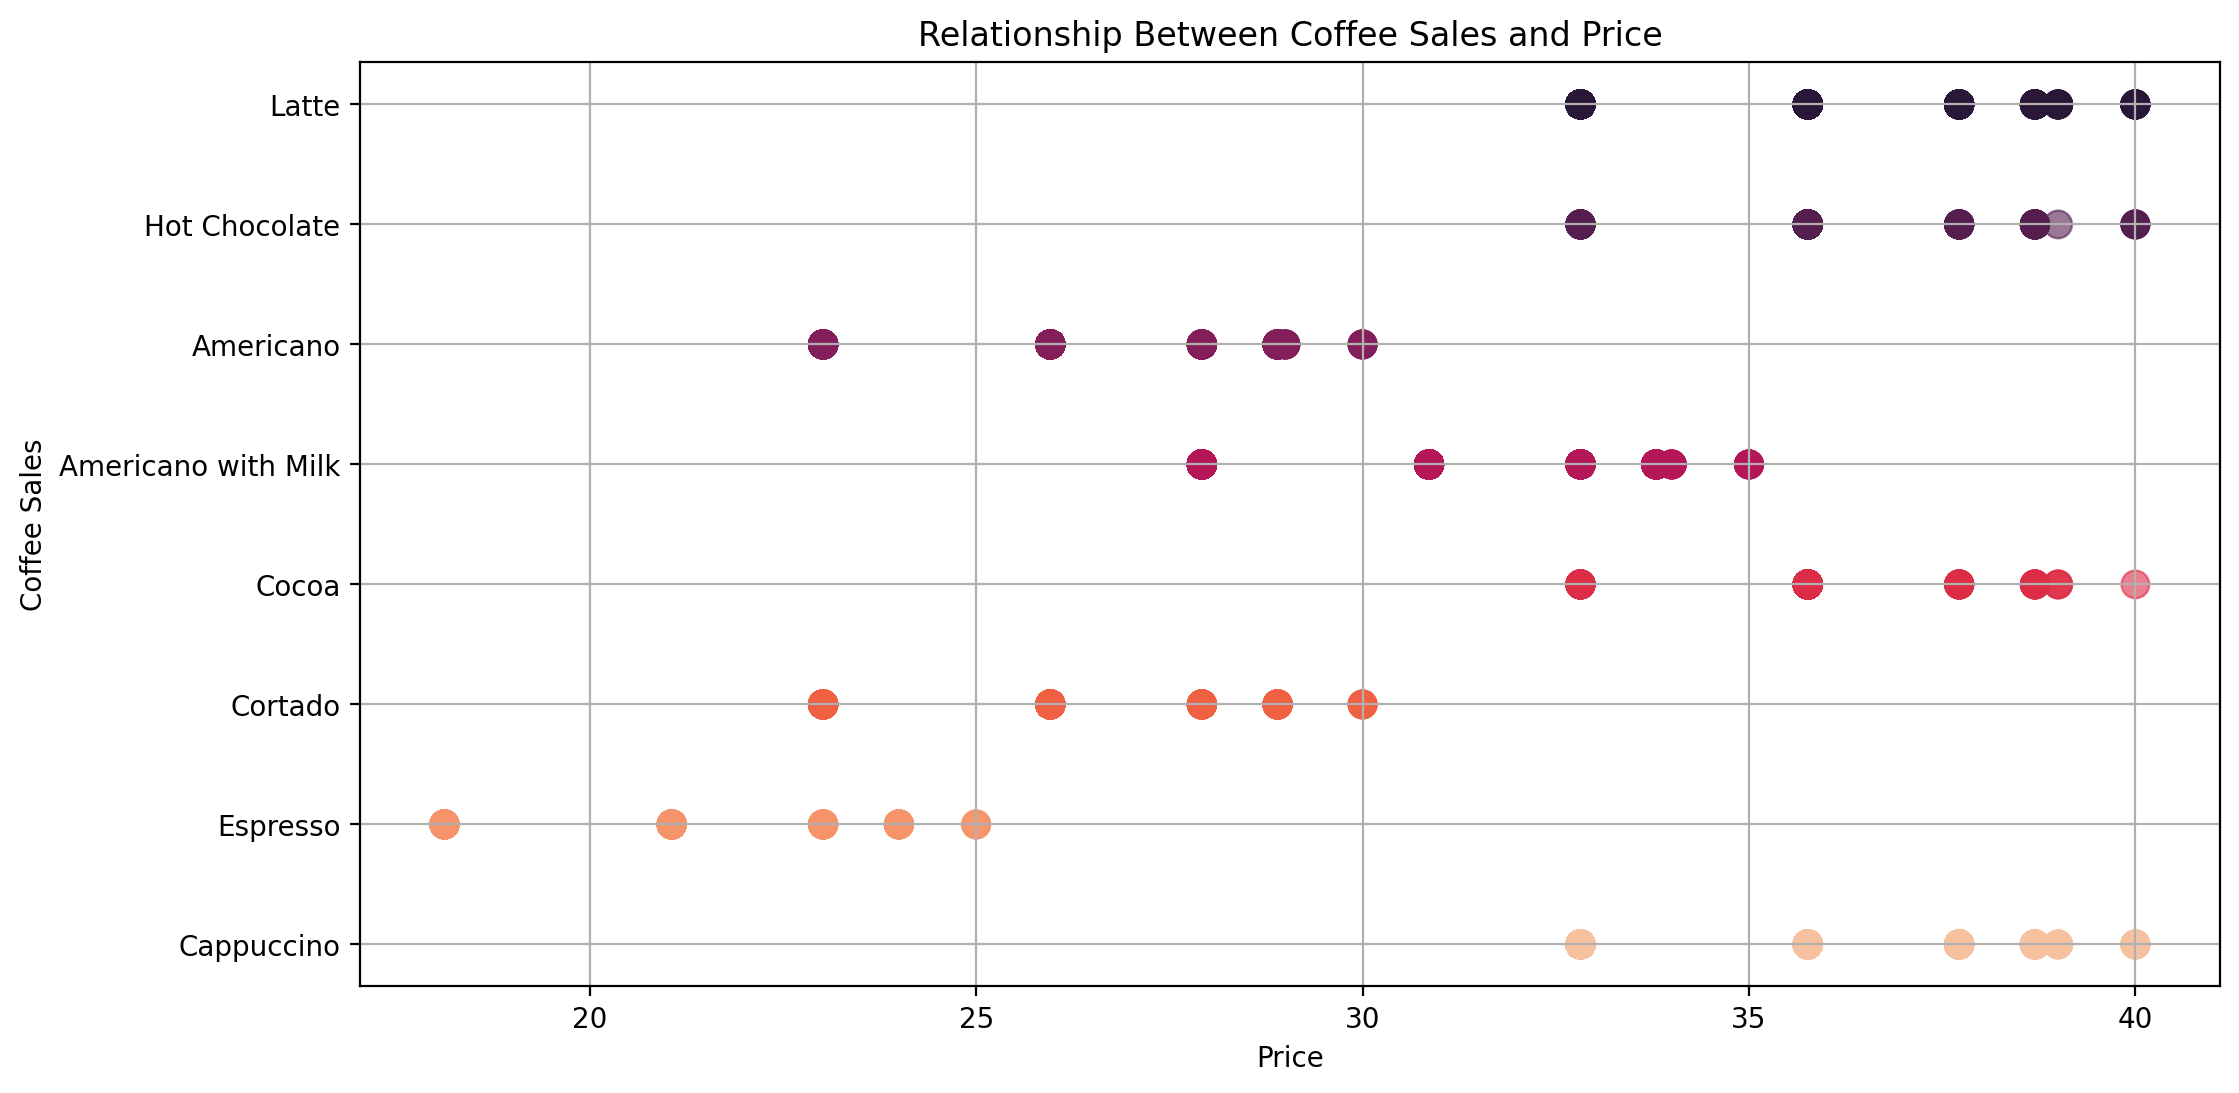

In [41]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df,x='money',y='coffee_name',hue='coffee_name',palette='rocket',s=100,alpha=0.6,edgecolor=None,legend=False)
plt.title('Relationship Between Coffee Sales and Price')
plt.xlabel('Price')
plt.ylabel('Coffee Sales')
plt.grid(True)
plt.show()

/var/folders/1m/4p7yv_4d2xxc9_rp8gxw39mw0000gn/T/ipykernel_55024/2436627567.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['money'], bins = 20, kde = True, palette =" browns")


Text(0.5, 1.0, 'Distribution of Money Spent')

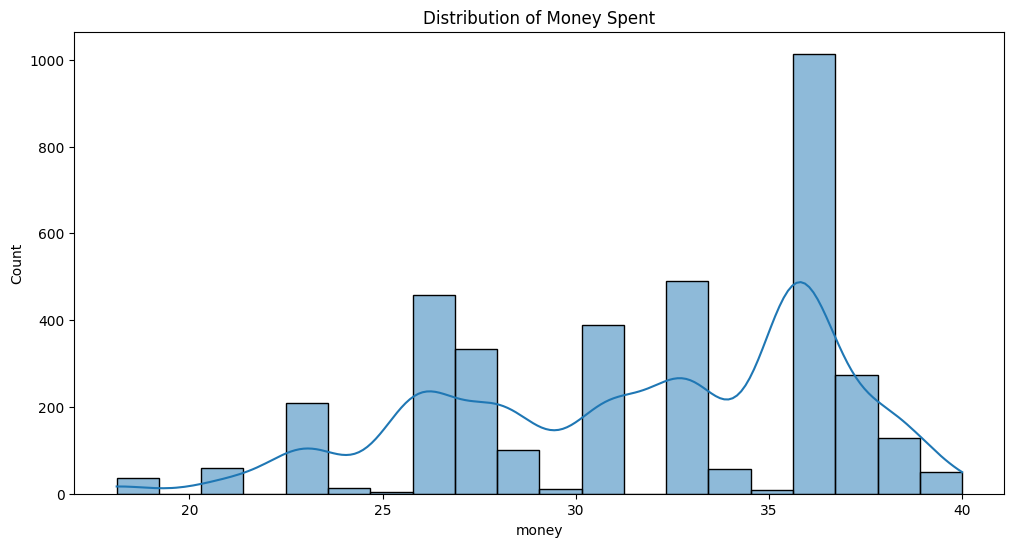

In [42]:
plt.figure(figsize = (12, 6))
sns.histplot(df['money'], bins = 20, kde = True, palette =" browns")
plt.title('Distribution of Money Spent')

Text(0.5, 1.0, 'Payment Method Distribution (Barchart)')

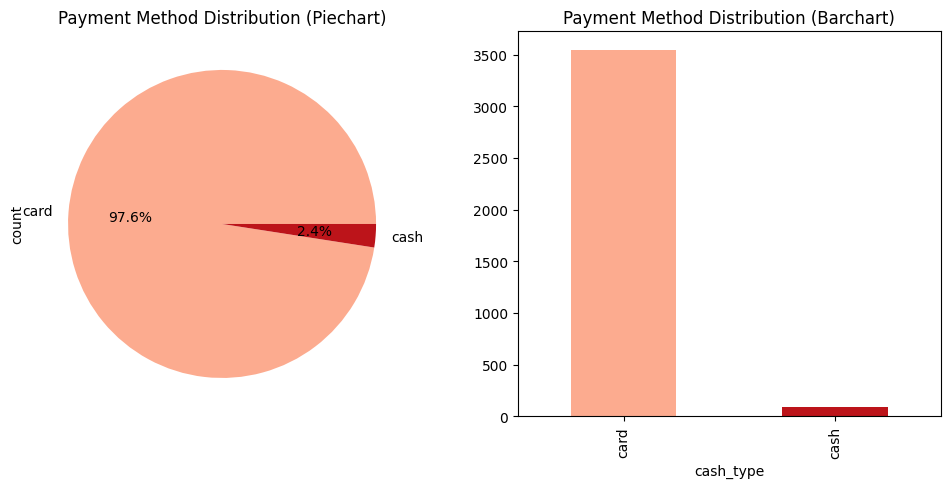

In [43]:
color = plt.cm.Reds(np.linspace(0.3, 0.8, 2))

fig, ax = plt.subplots(1, 2, figsize = (12,5))
df['cash_type'].value_counts().plot.pie(autopct = "%1.1f%%", colors = color, ax = ax[0])
ax[0].set_title('Payment Method Distribution (Piechart)')

df['cash_type'].value_counts().plot(kind = 'bar', color = color, ax = ax[1])
ax[1].set_title('Payment Method Distribution (Barchart)')

Text(0, 0.5, 'Total Sales Amount')

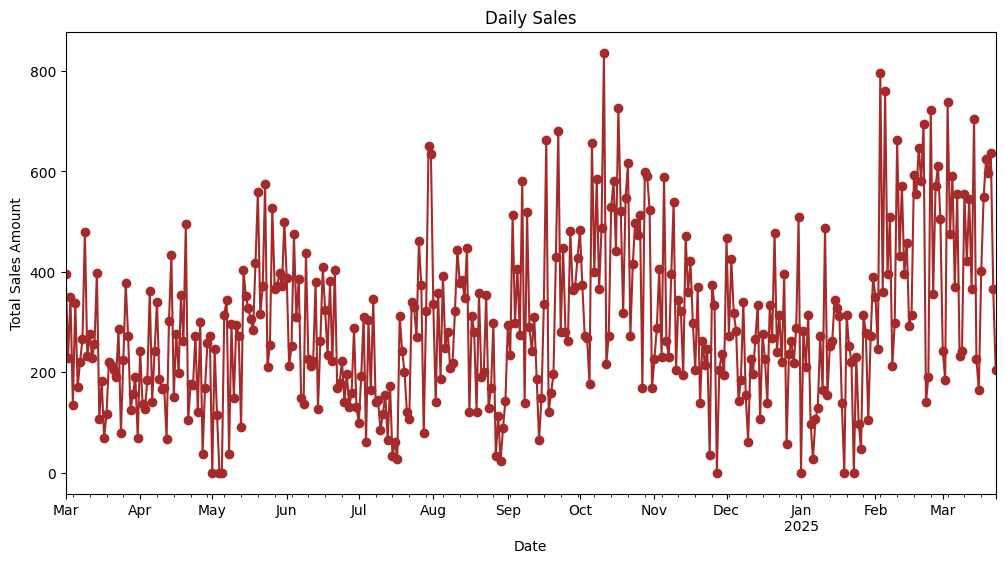

In [44]:
plt.figure(figsize = (12, 6))
df.set_index('datetime')['money'].resample('D').sum().plot(kind = "line", marker = "o", color = 'brown')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')

Text(0, 0.5, 'Sales amount')

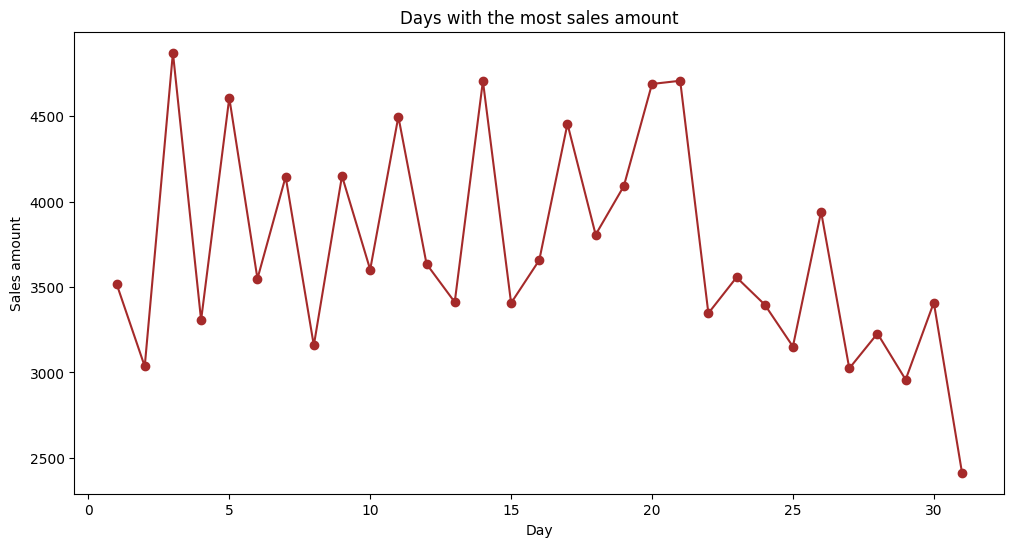

In [45]:
plt.figure(figsize = (12, 6))
df.groupby('Day')['money'].sum().plot(kind = "line", color = "brown", marker = 'o')
plt.title('Days with the most sales amount')
plt.xlabel('Day')
plt.ylabel('Sales amount')

Text(0, 0.5, 'Number of Sales')

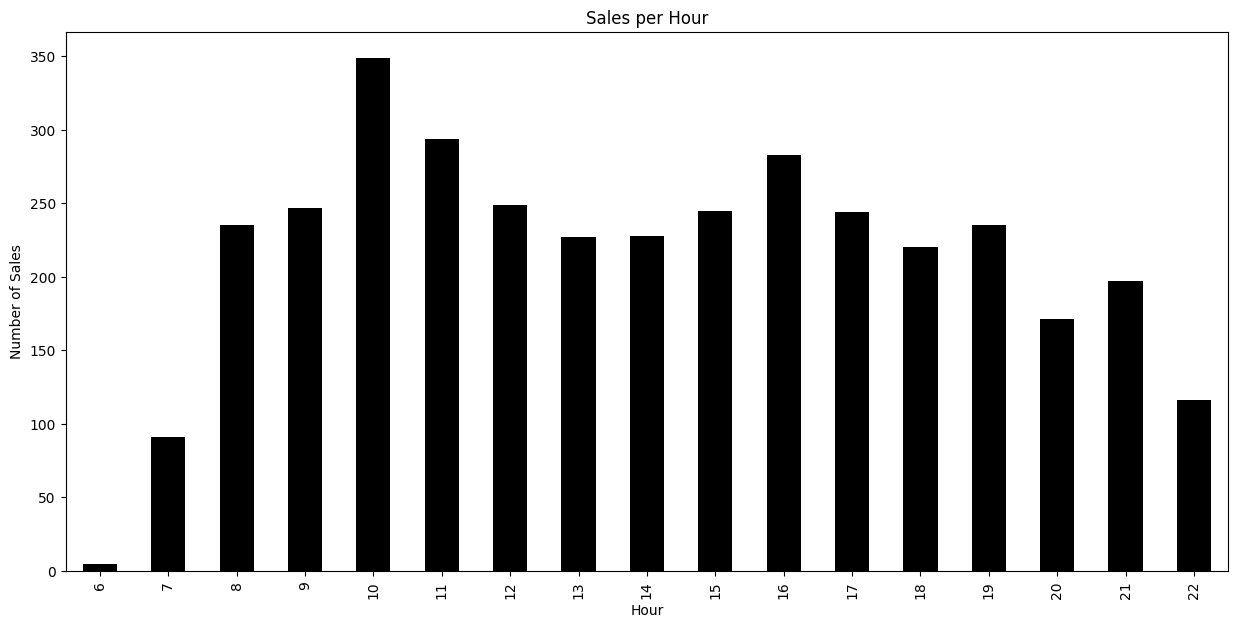

In [46]:
df.groupby('hour').size().plot(kind = "bar", figsize = (15,7), color = "k")
plt.title('Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')

In [47]:
df['hour'].value_counts()

hour
10    349
11    294
16    283
12    249
9     247
15    245
17    244
8     235
19    235
14    228
13    227
18    220
21    197
20    171
22    116
7      91
6       5
Name: count, dtype: int64

Text(120.72222222222221, 0.5, 'Hour of the day')

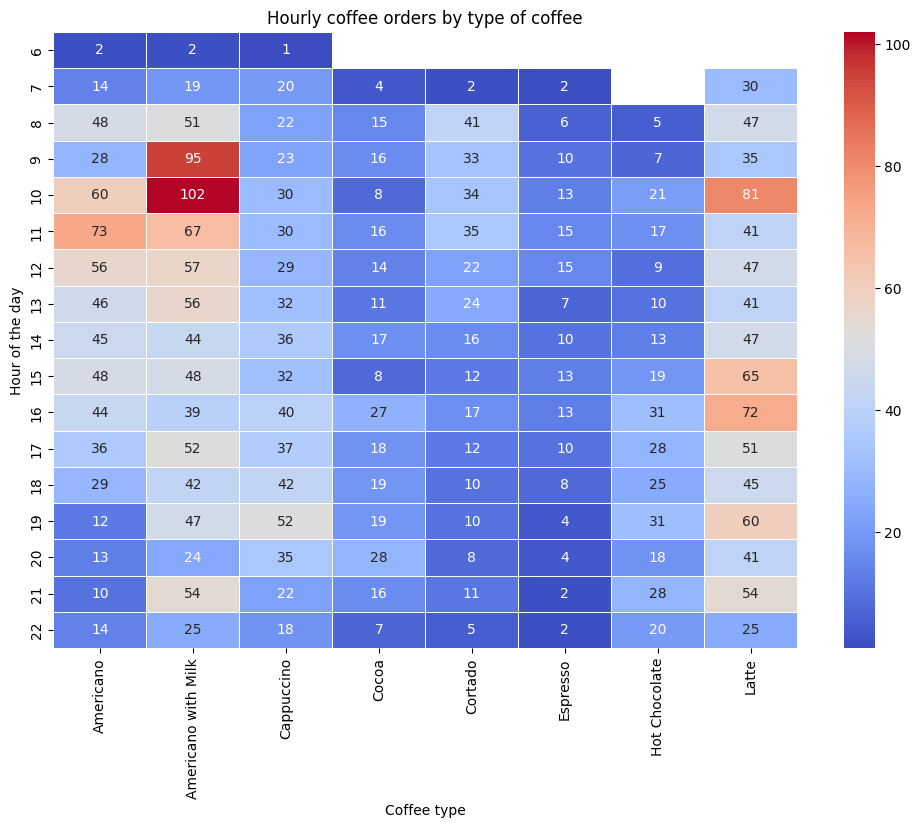

In [48]:
pivot_table2 =df.pivot_table(index='hour', columns='coffee_name', values='datetime', aggfunc='count')

plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table2, cmap='coolwarm', linewidths=.5, annot=True, fmt=".0f")
plt.title('Hourly coffee orders by type of coffee')
plt.xlabel('Coffee type')
plt.ylabel('Hour of the day')

Text(120.72222222222221, 0.5, 'Hour of the day')

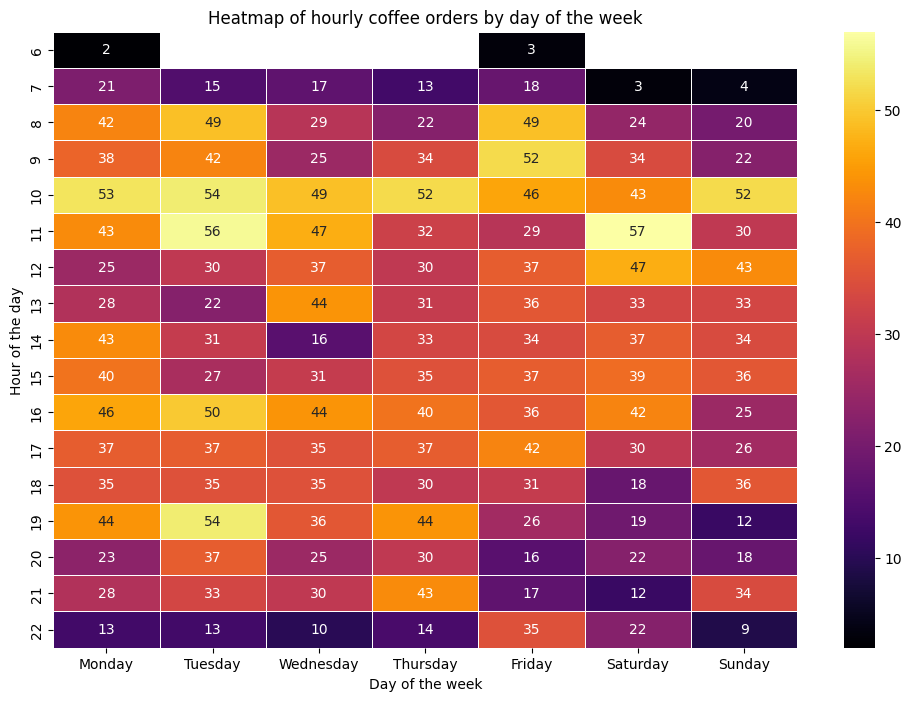

In [49]:
pivot_table = df.pivot_table(index='hour', columns='Day_Name', values='datetime', aggfunc='count')

# The order of days is alphabetical, we need to rearrange it
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table, cmap='inferno', linewidths=.5, annot=True, fmt=".0f")
plt.title('Heatmap of hourly coffee orders by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Hour of the day')
